In [10]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display

In [11]:
def set_classifier(cascPath):
    cascPath = cascPath
    faceCascade = cv2.CascadeClassifier(cascPath)
    return faceCascade
 
def count_item(classifier):
    count_item = 0
    for x in classifier: 
        count_item += 1
        if count_item >= 2:
            msg = 'Apenas uma face deve estar posicionada'
            return msg

def put_msg(msg,frame):
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0,0,255)
    cv2.putText(frame,msg,(30,30), font, 1,(255,255,255),2)

def set_nose_point(x,y,w,h,frame):
    #Marca ponto no nariz
    face_x = (x+(w/2))
    face_y = (y+(h/2))
    #Exibe ponto do nariz
    cv2.circle(frame,(face_x,face_y), 8, (0,255,0),-1)
        
def set_direction(x,y,ax,ay,stop):
    if(stop == True):
        print "STOP"
    else:
        if y < ay-precision_v: print "UP"
        elif y > ay+precision_v: print "DOWN"
        elif x < ax-precision_h: print "LEFT"
        elif x > ax+precision_h: print "RIGHT"

error: C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:7341: error: (-215) scn == 3 || scn == 4 in function cv::ipp_cvtColor


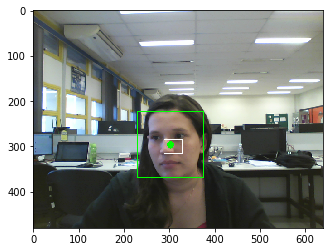

In [12]:
#Variaveis de controle e configuracao
calc_average = True
count_face = 0 
average_x = 0 
average_y = 0 
precision_h = 20
precision_v = 15
sp=0

vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    
        
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #Set the Face Classifier
        faceCascade = set_classifier('haarcascade_frontalface_default.xml')
        #Set the Smile Classifier
        smileCascade = set_classifier('haarcascade_smile.xml')

        #Seta as configuracoes do classificador do ROSTO
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=8,
            minSize=(120, 120)
        )
         #Desenha um retangulo no rosto encontrado
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            set_nose_point(x,y,w,h,frame)
            
            #Define Region of Intereting do SORRISO
            roi_smile = frame[y:y+h, x:x+w]
            #Seta as configuracoes do classificador do SORRISO
            smile = smileCascade.detectMultiScale(
            roi_smile,
            scaleFactor=2.7,
            minNeighbors=20,
            minSize=(10, 10)  
            )
            #Cria retangulo do SORRISO
            for (sp,sq,sr,ss) in smile:
                cv2.rectangle(roi_smile,(sp,sq),(sp+sr,sq+ss), (255,0,0),1)
             #Verificar a parada com o sorriso
            if sp in smile:
                stop = True
            else:
                stop = False
            #Calibrando Local do Retangulo de Referencia
            if calc_average:

                count_face += 1
                average_x += (x+(w/2))
                average_y += (y+(h/2))
                progress = (count_face/60.0) * 100


                if count_face==20:
                    average_x /= count_face
                    average_y /= count_face

                    calc_average = False
            else:   

                face_x = (x+(w/2)) 
                face_y = (y+(h/2))
                flag_save = True
            
            
                #Cria quadrado em volta do nariz
                cv2.rectangle(frame, (average_x-precision_h,average_y-precision_v),
                                         (average_x+precision_h,average_y+precision_v), (255,255,255))

                #Verifica a direcao do movimento do rosto
                set_direction(face_x,face_y,average_x,average_y,stop)
            
        webcam_preview.set_data(frame)
        plt.draw()

        display.clear_output(wait=True)
        display.display(plt.gcf())

        plt.pause(0.1)    # the pause time is = 1 / framerate
    except KeyboardInterrupt:
        vc.release()